![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTK4gQ9nhwHHaSXMHpeggWg7twwMCgb877smkRmtkmDeDoGF9Z6&usqp=CAU)

# <font color='Green'>Dicas e Truques de Ciência de Dados</font>

# <font color='Grey'> Automatizando Machine Learning </font>


![alt text](https://cienciadosdados.com/images/pycaret.png)

![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/05/Screenshot-from-2020-05-13-18-30-22.png)


https://pycaret.readthedocs.io/en/latest/api/classification.html

**PyCaret** é uma biblioteca de aprendizado de máquina de código aberto e baixo código em Python que automatiza fluxos de trabalho de aprendizado de máquina. É uma ferramenta de aprendizado de máquina e gerenciamento de modelos de ponta a ponta que acelera o ciclo de experimentos exponencialmente e torna você mais produtivo.


Em comparação com as outras bibliotecas de aprendizado de máquina de código aberto, PyCaret é uma biblioteca alternativa de baixo código que pode ser usada para **substituir centenas de linhas de código com apenas algumas palavras.** Isso torna os experimentos exponencialmente rápidos e eficientes. 


PyCaret **é essencialmente um empacotador Python** em torno de várias bibliotecas e estruturas de aprendizado de máquina, como scikit-learn , XGBoost , LightGBM , CatBoost , spaCy , Optuna , Hyperopt , Ray e muitos mais.

In [ ]:
# Instalação do pacote pycaret e shap (pacote de interpretabilidade da máquina preditiva)
!pip3 install pycaret
!pip3 install shap

In [2]:
#Importação de Bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Qual Problema Vamos Resolver e onde estão os dados?

Nessa aula, vamos resolver um problema de classificação. Temos um **conjunto de dados de uma fintech** com características como idade do cliente, experiência, renda, escolaridade e se ele possui um cartão de crédito ou não. 

Essa **Fintech** deseja construir um modelo de aprendizado de máquina que os ajudará a **identificar os clientes em potencial com maior probabilidade de adquirir um empréstimo pessoal.**



In [3]:
# Fonte de Dados no Github
dados = pd.read_csv('https://raw.githubusercontent.com/datacodebr/PyCaret-Example/master/datasets/loan_train_data.csv')

In [4]:
# Vendo os Primeiros Registros
dados.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,3510,38,12,61,91330,3,0.9,3,0,0,0,0,0,0
1,1129,30,5,171,94025,2,1.9,2,0,1,0,0,0,0
2,1637,65,39,100,92122,4,1.7,3,0,0,0,0,0,1
3,3165,28,4,82,95136,4,0.0,1,0,0,0,0,1,1
4,3563,32,8,169,94596,1,6.5,3,272,1,1,1,1,0


In [5]:
# Verificando a Versão dos Pacotes
from pycaret.utils import version
version()

'2.2.3'

In [6]:
# Importando o Pacote de Algoritmos de Classificação (mostrar na doc.)
from pycaret import classification


## Montando o SETUP - Configurando o Ambiente do Pycaret

A primeira etapa antes de iniciar nosso projeto de aprendizado de máquina no PyCaret é configurar o ambiente. É apenas um processo de duas etapas:

**1° Importando o Módulo:** 

Dependendo do tipo de problema que você vai resolver, primeiro você precisa importar o módulo. 

Temos 6 módulos diferentes disponíveis - regressão, classificação, clustering, processamento de linguagem natural (NLP), detecção de anomalias e regra de mineração associada. 

Nessa aula, vamos resolver um problema de classificação e, portanto, vamos importar o módulo de classificação


**2° Inicializando a configuração:** 

Nesta etapa, o PyCaret executa algumas tarefas básicas de pré-processamento, como ignorar os IDs e as colunas de data, imputar os valores ausentes, codificar as variáveis ​​categóricas e dividir o conjunto de dados na divisão de teste de trem para o restante das etapas de modelagem.

Quando você executa a função de configuração, ela primeiro confirma os tipos de dados e, em seguida, se você pressionar **enter**, criará o ambiente para você prosseguir

In [7]:
# SETUP
classification_setup = classification.setup(data= dados, target='Personal Loan')

,Description,Value
0,session_id,5780
1,Target,Personal Loan
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(4000, 14)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
#Escolhendo o Algoritmo 
classification_dt = classification.create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9750,0.9200,0.8519,0.8846,0.8679,0.8541,0.8543
1,0.9821,0.9405,0.8889,0.9231,0.9057,0.8958,0.8960
2,0.9929,0.9795,0.9630,0.9630,0.9630,0.9590,0.9590
3,0.9821,0.9570,0.9259,0.8929,0.9091,0.8992,0.8994
4,0.9536,0.8420,0.7037,0.7917,0.7451,0.7197,0.7212
5,0.9714,0.8849,0.7778,0.9130,0.8400,0.8244,0.8276
6,0.9750,0.9365,0.8889,0.8571,0.8727,0.8589,0.8590
7,0.9786,0.9563,0.9286,0.8667,0.8966,0.8846,0.8853
8,0.9750,0.9226,0.8571,0.8889,0.8727,0.8589,0.8590
9,0.9785,0.9385,0.8889,0.8889,0.8889,0.8770,0.8770


In [9]:
#Escolhendo o Algoritmo 
classification_xgb = classification.create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9821,0.9963,0.8148,1.0000,0.8980,0.8883,0.8939
1,0.9893,0.9974,0.9259,0.9615,0.9434,0.9375,0.9377
2,0.9964,0.9997,0.9630,1.0000,0.9811,0.9792,0.9794
3,0.9929,0.9966,0.9259,1.0000,0.9615,0.9576,0.9585
4,0.9750,0.9767,0.7778,0.9545,0.8571,0.8436,0.8489
5,0.9893,0.9987,0.8889,1.0000,0.9412,0.9353,0.9373
6,0.9821,0.9962,0.9259,0.8929,0.9091,0.8992,0.8994
7,0.9857,0.9950,0.9286,0.9286,0.9286,0.9206,0.9206
8,0.9893,0.9962,0.9286,0.9630,0.9455,0.9395,0.9397
9,0.9928,0.9988,0.9259,1.0000,0.9615,0.9576,0.9585


In [ ]:
#Escolhendo o Método de Aprendizagem Boosting
boosting = classification.ensemble_model(classification_dt, method= 'Boosting')

In [11]:
# Juntando Algoritmos
blender = classification.blend_models(estimator_list=[classification_dt, classification_xgb])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9750,0.9955,0.8519,0.8846,0.8679,0.8541,0.8543
1,0.9821,0.9969,0.8889,0.9231,0.9057,0.8958,0.8960
2,0.9929,0.9999,0.9630,0.9630,0.9630,0.9590,0.9590
3,0.9821,0.9959,0.9259,0.8929,0.9091,0.8992,0.8994
4,0.9536,0.9747,0.7037,0.7917,0.7451,0.7197,0.7212
5,0.9714,0.9975,0.7778,0.9130,0.8400,0.8244,0.8276
6,0.9750,0.9962,0.8889,0.8571,0.8727,0.8589,0.8590
7,0.9786,0.9963,0.9286,0.8667,0.8966,0.8846,0.8853
8,0.9750,0.9952,0.8571,0.8889,0.8727,0.8589,0.8590
9,0.9785,0.9978,0.8889,0.8889,0.8889,0.8770,0.8770


## Avaliação: Comparação de Algoritmos

Esta é outra função útil da biblioteca PyCaret. Se você não quiser experimentar os diferentes modelos um por um, pode usar a função comparar modelos e ela treinará e comparará as métricas de avaliação comuns para todos os modelos disponíveis na biblioteca do módulo que você importou.

In [12]:
#Comparação de modelos
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9875,0.9952,0.9005,0.9700,0.9327,0.9258,0.9274,0.706
lightgbm,Light Gradient Boosting Machine,0.9875,0.9967,0.8858,0.9834,0.9317,0.9248,0.9266,0.107
catboost,CatBoost Classifier,0.9846,0.9970,0.8747,0.9670,0.9164,0.9080,0.9106,2.607
rf,Random Forest Classifier,0.9843,0.9959,0.8489,0.9880,0.9112,0.9027,0.9070,0.594
gbc,Gradient Boosting Classifier,0.9843,0.9962,0.8784,0.9596,0.9150,0.9064,0.9088,0.389
et,Extra Trees Classifier,0.9818,0.9854,0.8122,1.0000,0.8953,0.8854,0.8918,0.517
dt,Decision Tree Classifier,0.9764,0.9278,0.8675,0.8870,0.8762,0.8632,0.8638,0.022
ada,Ada Boost Classifier,0.9678,0.9801,0.7680,0.8908,0.8207,0.8033,0.8082,0.167
lda,Linear Discriminant Analysis,0.9435,0.9570,0.6181,0.7636,0.6771,0.6468,0.6545,0.025
ridge,Ridge Classifier,0.9378,0.0000,0.3828,0.9495,0.5356,0.5100,0.5746,0.022


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=5780, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='auto',
              use_label_encoder=True, validate_parameters=1, verbosity=0)

In [14]:
# Criando a Máquina com o Algoritmo Escolhido.
classification_xgboost = classification.create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9821,0.9963,0.8148,1.0000,0.8980,0.8883,0.8939
1,0.9893,0.9974,0.9259,0.9615,0.9434,0.9375,0.9377
2,0.9964,0.9997,0.9630,1.0000,0.9811,0.9792,0.9794
3,0.9929,0.9966,0.9259,1.0000,0.9615,0.9576,0.9585
4,0.9750,0.9767,0.7778,0.9545,0.8571,0.8436,0.8489
5,0.9893,0.9987,0.8889,1.0000,0.9412,0.9353,0.9373
6,0.9821,0.9962,0.9259,0.8929,0.9091,0.8992,0.8994
7,0.9857,0.9950,0.9286,0.9286,0.9286,0.9206,0.9206
8,0.9893,0.9962,0.9286,0.9630,0.9455,0.9395,0.9397
9,0.9928,0.9988,0.9259,1.0000,0.9615,0.9576,0.9585


In [ ]:
# Avaliando Métricas : AUC
classification.plot_model(classification_xgboost , plot  =  'auc' )

In [ ]:
# Avaliando Métricas : Precision Recall
classification.plot_model(classification_xgboost, plot = 'pr')

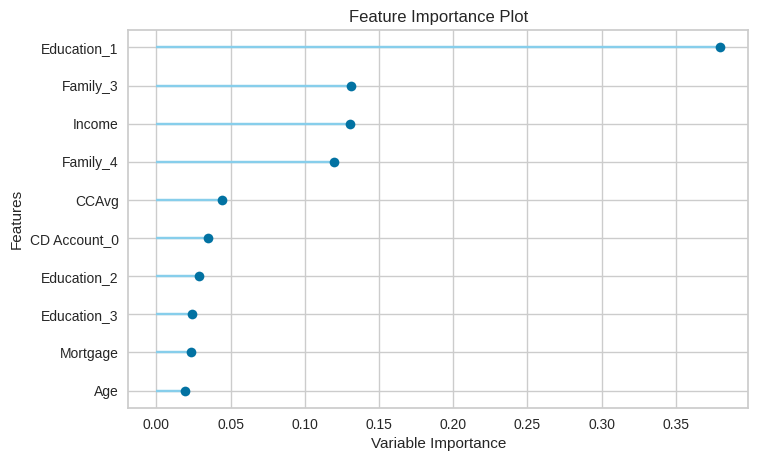

In [17]:
# Importância das Variáveis
classification.plot_model(classification_xgboost, plot = 'feature')

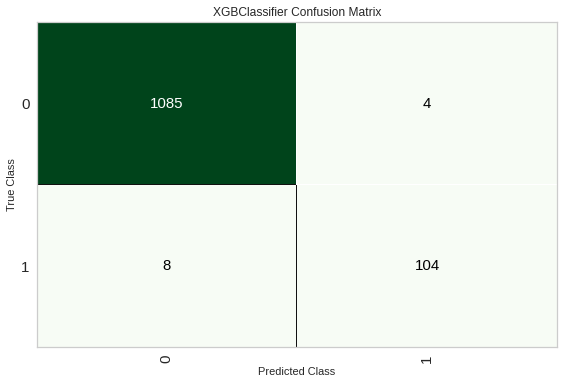

In [18]:
# Confusion Matrix
classification.plot_model(classification_xgboost, plot = 'confusion_matrix')

## Automatizando a Avaliação de Métricas de Avaliação

In [19]:
# Verificando Métricas
classification.evaluate_model(classification_xgboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
# Interpretando a máquina preditiva: SHAP
classification.interpret_model(classification_xgboost)

In [ ]:
# Interpretando a máquina preditiva: SHAP
classification.interpret_model(classification_xgboost,plot='correlation')

## Passando novos Clientes na Máquina Preditiva

In [22]:
# Dados de Teste - novos Dados
test_data_classification = pd.read_csv('https://raw.githubusercontent.com/datacodebr/PyCaret-Example/master/datasets/loan_test_data.csv')

In [ ]:
test_data_classification

In [24]:
# Fazendo Previsões
predictions = classification.predict_model(classification_xgboost, data=test_data_classification)

In [ ]:
predictions

## Salvando a Máquina Preditiva para Produção 

In [ ]:
#Save
classification.save_model(classification_xgboost, 'MP_EMP_xgboost_prod')

## Carregando a Máquina Preditiva

Aqui a Máquina pode ser Utilizada numa Aplicação (pode ser uma aplicação WEB....)

In [27]:
MP_EMP_xgboost_prod = classification.load_model(model_name='MP_EMP_xgboost_prod')

Transformation Pipeline and Model Successfully Loaded


#Fim

## Valeu!

### #Links - Ciência dos Dados <a href="https://linktr.ee/cienciadosdados">https://linktr.ee/cienciadosdados</a>

### #YouTube - Mais Aulas como essa no YouTube <a href="https://www.youtube.com/watch?v=IaIc5oHd3II&t=1569s">https://www.youtube.com/watch?v=IaIc5oHd3II&t=1569s</a>

In [ ]:
from IPython.core.display import HTML
HTML('<iframe width="340" height="200" src="https://www.youtube.com/embed/K1y3Sf6xw_g" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')